In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel("C:/Users/vaishnavi/Desktop/DBDA\ML Practical/Assignments/classification/fruitdata.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  59 non-null     int64  
 1   fruit_name   59 non-null     object 
 2   mass         59 non-null     int64  
 3   width        59 non-null     float64
 4   height       59 non-null     float64
 5   color_score  59 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.9+ KB


In [3]:
df["fruit_name"].value_counts()


fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

In [4]:
df[["fruit_label","mass","width","height","color_score"]].corr()

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


In [38]:
X=df[["width","height","color_score"]].values
print(X.shape)
y= df["fruit_label"].values
y.shape

(59, 3)


(59,)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 100)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(47, 3) (12, 3) (47,) (12,)


In [41]:
from sklearn.svm import SVC

In [42]:
model = SVC() #kernel = 'rbf','sigmoid'
model.fit(X_train,y_train).score(X_test,y_test)

0.6666666666666666

In [43]:
width = np.arange(X_test[:, 0].min() - 0.2, X_test[:, 0].max() + 0.2, 0.01)
height = np.arange(X_test[:, 1].min() - 0.2, X_test[:, 1].max() + 0.2, 0.01)
color_score = np.arange(X_test[:, 2].min() - 0.2, X_test[:, 2].max() + 0.2, 0.01)
width, height, color_score = np.meshgrid(width, height, color_score)

print(width.shape, height.shape, color_score.shape)

# Flatten the grid to pass into the model for prediction
formed_data = np.c_[width.ravel(), height.ravel(), color_score.ravel()]

# Predict using the model and reshape the result back to the grid shape
Z = model.predict(formed_data).reshape(width.shape)

print(Z.shape) 

(660, 410, 73) (660, 410, 73) (660, 410, 73)
(660, 410, 73)


C:\Users\vaishnavi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


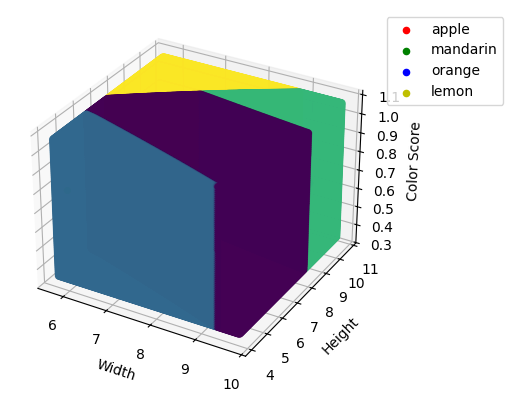

In [44]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Using scatter plot for the predictions
ax.scatter(width.ravel(), height.ravel(), color_score.ravel(), c=Z.ravel(), alpha=0.3, cmap='viridis')

# Scatter plot the test data points with correct indices and labels
ax.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], X_test[y_test == 1, 2], c='r', label='apple')
ax.scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1], X_test[y_test == 2, 2], c='g', label='mandarin')
ax.scatter(X_test[y_test == 3, 0], X_test[y_test == 3, 1], X_test[y_test == 3, 2], c='b', label='orange')
ax.scatter(X_test[y_test == 4, 0], X_test[y_test == 4, 1], X_test[y_test == 4, 2], c='y', label='lemon')

ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Color Score')

ax.legend(bbox_to_anchor=(1, 1))
plt.show()